# Project 1, Part 2, Executive Questions: Customer Specific Questions

University of California, Berkeley
Master of Information and Data Science (MIDS) program
w205 - Fundamentals of Data Engineering

Student: Landon Morin

Year: 2022

Semester: Spring

Section: 9


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings


import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

In [3]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

In [4]:
cursor = connection.cursor()
warnings.filterwarnings('ignore')

# Instructions for Specific Questions

For each specific quesion, you must write 1 and only 1 query that answers that specific question.  The results of your query must be displayed in a Pandas dataframe as demonstrated in the labs

All output should be sorted.

For store name, use the city name the store is located in.

When sorting by store name, sort in alphabetical order.


# 1.2.1 Total Number of Customers for all of AGM

In [5]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(customer_id) as total_customers  
from customers

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_customers
0,31082


# 1.2.2 Total Number of Customers by Store

Sort by store name in alphabetical order

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
       count(c.customer_id) as total_customers
from stores as s 
     join customers as c 
         on s.store_id = c.closest_store_id
group by store
order by store



"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)


,store,total_customers
0,Berkeley,8138
1,Dallas,6359
2,Miami,5725
3,Nashville,3646
4,Seattle,7214


# 1.2.3 Total Number of Customers by Distance from Store

Sort by shortest distance first

In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(customer_id) as total_customers, 
       distance as distance_from_store
from customers
group by distance
order by distance

"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,total_customers,distance_from_store
0,2790,1
1,1685,2
2,2417,3
3,2994,4
4,2426,5
5,2478,6
6,2107,7
7,2311,8
8,1906,9
9,1779,10


# 1.2.4 List of Customers who have signed up but not bought anything

Sort by customer last name, then first name

In [8]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select c.customer_id,
       c.last_name || ' ' || c.first_name as customer_name
from customers as c
    left join sales as s
        on c.customer_id = s.customer_id
where s.total_amount is NULL
group by c.customer_id, s.total_amount
order by c.last_name, c.first_name

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,customer_id,customer_name
0,9318,Agott Tracy
1,2676,Arnke Daniella
2,21030,Assandri Hyacintha
3,7600,Borman Felice
4,30414,Breit Domini
5,5148,Butterick Jacenta
6,11113,Camillo Marysa
7,295,Dukelow Lilas
8,21644,Dukesbury Corinna
9,10999,Ellaway Lorianna


# 1.2.5 What is the percentage of customers per population at the zip code level?

Sort by highest percentage first

In [9]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select c.zip as zip,
       count(c.customer_id)/sum(z.population)*100 as customer_pct_population
from customers as c 
     join zip_codes as z 
         on c.zip = z.zip
group by c.zip, z.population
order by customer_pct_population desc




"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)


,zip,customer_pct_population
0,33122,0.917431
1,94128,0.740741
2,94516,0.675676
3,98164,0.645161
4,94569,0.487805
...,...,...
545,75217,0.001151
546,75052,0.001047
547,94565,0.001041
548,37013,0.001022


# 1.2.6 What is the percentage of customers per population at the city level?

Sort by highest percentage first

In [10]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select c.city as city,
       count(c.customer_id)/sum(z.population)*100 as customer_pct_population
from customers as c 
     left join zip_codes as z 
         on c.city = z.city
group by distinct(c.city, c.state)
order by customer_pct_population desc


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,city,customer_pct_population
0,Port Costa,0.487805
1,Diablo,0.325733
2,San Geronimo,0.200803
3,Stinson Beach,0.145138
4,Ross,0.124456
...,...,...
193,Daly City,0.001748
194,Antioch,0.001720
195,The Colony,0.001689
196,San Pablo,0.001553


# 1.2.7 The Executives have also asked you to provide your best example of a data visualization for one of the above queries

You may choose any one of the above queries. 

It's best to select the one that you think will provide the most interesting data visualization.  

You are allowed to add a pivot as demonstrated in the labs if it is needed for your data visualization. 

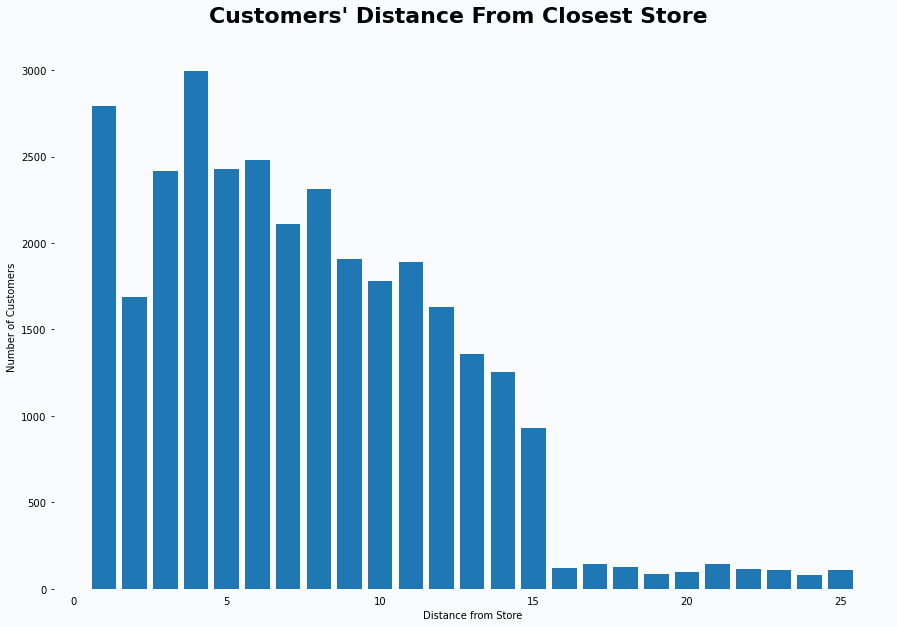

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(df['distance_from_store'], df['total_customers'])
ax.tick_params(bottom=False)
ax.set_frame_on(False)
plt.xlabel('Distance from Store')
plt.ylabel('Number of Customers')
fig.text(
    x=0.5, 
    y=0.92,
    s="Customers' Distance From Closest Store",
    ha="center",
    va="center",
    ma="center",
    fontsize=22,
    fontweight="bold",
)

fig.set_facecolor("#f9fbfc")

